<a href="https://colab.research.google.com/github/PunitRaveendran/ACM/blob/main/Bagging%20and%20Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cycle 2 Day 1

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:57:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Accuracy: 0.9766081871345029
AdaBoost Accuracy: 0.9883040935672515
XGBoost Accuracy: 0.9883040935672515
/nAccuracy Comparision:
            Model  Accuracy
0  Random Forest  0.976608
1       AdaBoost  0.988304
2        XGBoost  0.988304


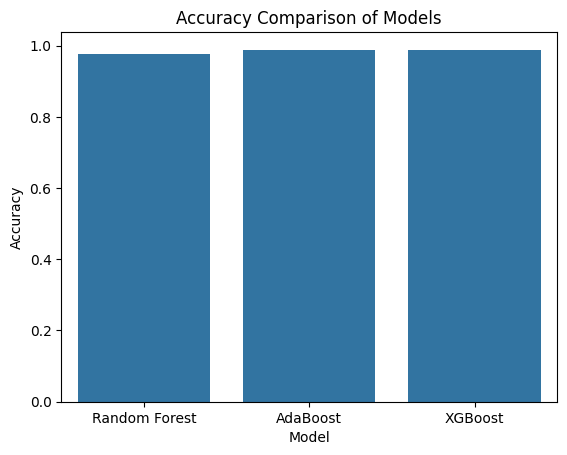


Random Forest Error Analysis:


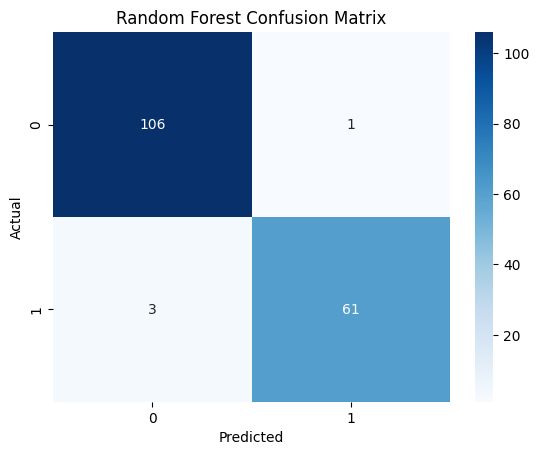


Random Forest Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98       107
   Malignant       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


AdaBoost Error Analysis:


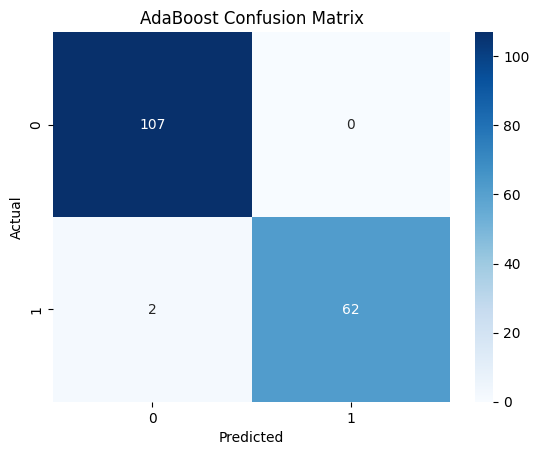


AdaBoost Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      1.00      0.99       107
   Malignant       1.00      0.97      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171


XGBoost Error Analysis:


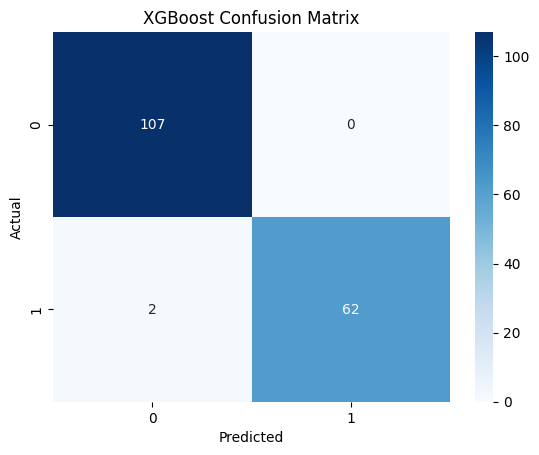


XGBoost Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      1.00      0.99       107
   Malignant       1.00      0.97      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/breast-cancer.csv")

# Checking for missing values
print(df.isnull().sum())

#No missing values found after running

# Dropping the unnecessary columns (ex: ID)
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# Encode the target column
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=24,stratify=y)

#Training the model

#Bagging by Random Forest criterion
rf = RandomForestClassifier(n_estimators=250, random_state=24)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# AdaBoost (Boosting)
ada = AdaBoostClassifier(n_estimators=250, random_state=24)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

# XGBoost (Boosting)
xgb = XGBClassifier(n_estimators=250, random_state=24, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# Comparing the accuracies
rf_acc = accuracy_score(y_test, rf_pred)
ada_acc = accuracy_score(y_test, ada_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)

print(f"Random Forest Accuracy: {rf_acc}")
print(f"AdaBoost Accuracy: {ada_acc}")
print(f"XGBoost Accuracy: {xgb_acc}")

# Inserting all the values in a dataframe to compare and contrast
results = pd.DataFrame({'Model': ['Random Forest', 'AdaBoost', 'XGBoost'],
                        'Accuracy': [rf_acc, ada_acc, xgb_acc]})
print ("/nAccuracy Comparision:\n", results)

#Plotting the values
sns.barplot(x = 'Model' , y = 'Accuracy' , data = results)
plt.title('Accuracy Comparison of Models')
plt.show()

# Error analysis(basic)
models = {"Random Forest": rf_pred, "AdaBoost": ada_pred, "XGBoost": xgb_pred}

for model_name, predictions in models.items():
    print(f"\n{model_name} Error Analysis:")
    conf_matrix = confusion_matrix(y_test, predictions)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, predictions, target_names =['Benign','Malignant']))
